Hypothesis H0:I increase the frequency of recording sleep If I am getting less hours of sleep

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

I have transformed my XML file into a CSV file,using https://www.ericwolter.com/projects/apple-health-export/. However, there is unnecessary column present in the Excel sheet, necessitating manual deletion.

In [15]:
file_path = "/content/sleep_analysis.csv"
df = pd.read_csv(file_path)
df.head()

,type,sourcename,sourceversion,device,creationdate,startdate,enddate,value,HKTimeZone
0,HKCategoryTypeIdentifierSleepAnalysis,Clock,50,"<<HKDevice: 0x283714050>, name:iPhone, manufac...",2018-03-19 05:45:20 +0300,2018-03-18 22:45:00 +0300,2018-03-19 05:45:20 +0300,HKCategoryValueSleepAnalysisInBed,Europe/Istanbul
1,HKCategoryTypeIdentifierSleepAnalysis,Clock,50,"<<HKDevice: 0x283714050>, name:iPhone, manufac...",2018-03-20 05:45:25 +0300,2018-03-20 00:07:04 +0300,2018-03-20 05:30:24 +0300,HKCategoryValueSleepAnalysisInBed,Europe/Istanbul
2,HKCategoryTypeIdentifierSleepAnalysis,Clock,50,"<<HKDevice: 0x283714050>, name:iPhone, manufac...",2018-03-20 05:45:25 +0300,2018-03-20 05:31:04 +0300,2018-03-20 05:45:20 +0300,HKCategoryValueSleepAnalysisInBed,Europe/Istanbul
3,HKCategoryTypeIdentifierSleepAnalysis,Clock,50,"<<HKDevice: 0x283714050>, name:iPhone, manufac...",2018-03-22 05:55:37 +0300,2018-03-21 23:50:00 +0300,2018-03-22 05:55:37 +0300,HKCategoryValueSleepAnalysisInBed,Europe/Istanbul
4,HKCategoryTypeIdentifierSleepAnalysis,Clock,50,"<<HKDevice: 0x283714050>, name:iPhone, manufac...",2018-03-23 05:55:39 +0300,2018-03-23 03:28:24 +0300,2018-03-23 05:55:34 +0300,HKCategoryValueSleepAnalysisInBed,Europe/Istanbul


In [16]:
unique_sourcenames = df['sourcename'].unique()

# Display the unique values
print("Unique values in sourcename column:")
for sourcename in unique_sourcenames:
    print(sourcename)

Unique values in sourcename column:
Clock
iPhone
Health
Atayolu
Ahmet’s Apple Watch


In [17]:

# Filter rows where 'sourcename' is equal to the specified value
new_df = df[df['sourcename'] == sourcename].copy()

# Print the specified sourcename
print("Sourcename:", sourcename)

# Display the data types of columns in the filtered DataFrame
column_data_types = new_df.dtypes
print("\nData types of columns in the filtered DataFrame:")
print(column_data_types)


new_df.head()

Sourcename: Ahmet’s Apple Watch

Data types of columns in the filtered DataFrame:
type             object
sourcename       object
sourceversion    object
device           object
creationdate     object
startdate        object
enddate          object
value            object
HKTimeZone       object
dtype: object


,type,sourcename,sourceversion,device,creationdate,startdate,enddate,value,HKTimeZone
2979,HKCategoryTypeIdentifierSleepAnalysis,Ahmet’s Apple Watch,9.2,NaN,2023-05-12 10:01:29 +0300,2023-05-12 03:57:02 +0300,2023-05-12 04:12:02 +0300,HKCategoryValueSleepAnalysisAsleepUnspecified,Europe/Berlin
2980,HKCategoryTypeIdentifierSleepAnalysis,Ahmet’s Apple Watch,9.2,NaN,2023-05-12 10:01:29 +0300,2023-05-12 03:57:02 +0300,2023-05-12 04:12:02 +0300,HKCategoryValueSleepAnalysisInBed,Europe/Berlin
2981,HKCategoryTypeIdentifierSleepAnalysis,Ahmet’s Apple Watch,9.2,NaN,2023-05-12 10:01:29 +0300,2023-05-12 04:12:02 +0300,2023-05-12 04:32:02 +0300,HKCategoryValueSleepAnalysisAwake,Europe/Berlin
2982,HKCategoryTypeIdentifierSleepAnalysis,Ahmet’s Apple Watch,9.2,NaN,2023-05-12 10:01:29 +0300,2023-05-12 04:32:02 +0300,2023-05-12 04:48:02 +0300,HKCategoryValueSleepAnalysisAsleepUnspecified,Europe/Berlin
2983,HKCategoryTypeIdentifierSleepAnalysis,Ahmet’s Apple Watch,9.2,NaN,2023-05-12 10:01:29 +0300,2023-05-12 04:32:02 +0300,2023-05-12 04:48:02 +0300,HKCategoryValueSleepAnalysisInBed,Europe/Berlin


In [18]:
# Convert 'creationdate', 'startdate', and 'enddate' to datetime
new_df['creationdate'] = pd.to_datetime(new_df['creationdate'])
new_df['startdate'] = pd.to_datetime(new_df['startdate'])
new_df['enddate'] = pd.to_datetime(new_df['enddate'])

column_data_types = new_df.dtypes
print("\nData types of columns in the filtered DataFrame:")
print(column_data_types)


Data types of columns in the filtered DataFrame:
type                                            object
sourcename                                      object
sourceversion                                   object
device                                          object
creationdate     datetime64[ns, pytz.FixedOffset(180)]
startdate        datetime64[ns, pytz.FixedOffset(180)]
enddate          datetime64[ns, pytz.FixedOffset(180)]
value                                           object
HKTimeZone                                      object
dtype: object


In [19]:
sleep_analysis_values = new_df[new_df['value'].str.contains("HKCategoryValueSleepAnalysis")]['value'].unique()

print("\nUnique values in 'value' column after HKCategoryValueSleepAnalysis:")
for value in sleep_analysis_values:
    print(value)


Unique values in 'value' column after HKCategoryValueSleepAnalysis:
HKCategoryValueSleepAnalysisAsleepUnspecified
HKCategoryValueSleepAnalysisInBed
HKCategoryValueSleepAnalysisAwake
HKCategoryValueSleepAnalysisAsleepCore
HKCategoryValueSleepAnalysisAsleepDeep
HKCategoryValueSleepAnalysisAsleepREM


In [20]:
# Calculate the duration and create a new 'duration' column
new_df['duration'] = (new_df['enddate'] - new_df['startdate']).dt.total_seconds() / 60

# Display the data types of columns in the filtered DataFrame
column_data_types = new_df.dtypes
print("\nData types of columns in the filtered DataFrame:")
print(column_data_types)

# Display the first few rows of the DataFrame with the new 'duration' column
new_df.head()


Data types of columns in the filtered DataFrame:
type                                            object
sourcename                                      object
sourceversion                                   object
device                                          object
creationdate     datetime64[ns, pytz.FixedOffset(180)]
startdate        datetime64[ns, pytz.FixedOffset(180)]
enddate          datetime64[ns, pytz.FixedOffset(180)]
value                                           object
HKTimeZone                                      object
duration                                       float64
dtype: object


,type,sourcename,sourceversion,device,creationdate,startdate,enddate,value,HKTimeZone,duration
2979,HKCategoryTypeIdentifierSleepAnalysis,Ahmet’s Apple Watch,9.2,NaN,2023-05-12 10:01:29+03:00,2023-05-12 03:57:02+03:00,2023-05-12 04:12:02+03:00,HKCategoryValueSleepAnalysisAsleepUnspecified,Europe/Berlin,15.0
2980,HKCategoryTypeIdentifierSleepAnalysis,Ahmet’s Apple Watch,9.2,NaN,2023-05-12 10:01:29+03:00,2023-05-12 03:57:02+03:00,2023-05-12 04:12:02+03:00,HKCategoryValueSleepAnalysisInBed,Europe/Berlin,15.0
2981,HKCategoryTypeIdentifierSleepAnalysis,Ahmet’s Apple Watch,9.2,NaN,2023-05-12 10:01:29+03:00,2023-05-12 04:12:02+03:00,2023-05-12 04:32:02+03:00,HKCategoryValueSleepAnalysisAwake,Europe/Berlin,20.0
2982,HKCategoryTypeIdentifierSleepAnalysis,Ahmet’s Apple Watch,9.2,NaN,2023-05-12 10:01:29+03:00,2023-05-12 04:32:02+03:00,2023-05-12 04:48:02+03:00,HKCategoryValueSleepAnalysisAsleepUnspecified,Europe/Berlin,16.0
2983,HKCategoryTypeIdentifierSleepAnalysis,Ahmet’s Apple Watch,9.2,NaN,2023-05-12 10:01:29+03:00,2023-05-12 04:32:02+03:00,2023-05-12 04:48:02+03:00,HKCategoryValueSleepAnalysisInBed,Europe/Berlin,16.0


In [21]:

# Assuming 'daily_df' is your DataFrame with the calculated sleep categories

# Create a new DataFrame with unique values of 'creationdate'
daily_df = pd.DataFrame({'creationdate': new_df['creationdate'].unique()})

# Sleep categories to check for
sleep_categories = [
    'HKCategoryValueSleepAnalysisAsleepUnspecified',
    'HKCategoryValueSleepAnalysisAwake',
    'HKCategoryValueSleepAnalysisAsleepCore',
    'HKCategoryValueSleepAnalysisAsleepDeep',
    'HKCategoryValueSleepAnalysisAsleepREM',
    'HKCategoryValueSleepAnalysisInBed'
]

# Iterate through rows in 'daily_df' and calculate sleep categories based on conditions
for category in sleep_categories:
    daily_df[category.replace('HKCategoryValueSleepAnalysis', '')] = daily_df.apply(
        lambda row: new_df[
            (new_df['creationdate'] == row['creationdate']) &
            (new_df['value'] == category)
        ]['duration'].sum(), axis=1
    )

# Convert 'creationdate' to datetime
daily_df['creationdate'] = pd.to_datetime(daily_df['creationdate'])

# Extract month and year from 'creationdate' and create a new 'month_year' column
daily_df['month_year'] = daily_df['creationdate'].dt.to_period('M')

# Create a new DataFrame for monthly data
monthly_df = daily_df.groupby('month_year').agg({'AsleepUnspecified': 'sum', 'Awake': 'sum', 'AsleepCore': 'sum', 'AsleepDeep': 'sum', 'AsleepREM': 'sum', 'InBed': 'sum', 'creationdate': pd.Series.nunique}).reset_index()
monthly_df.columns = ['month_year', 'AsleepUnspecified', 'Awake', 'AsleepCore', 'AsleepDeep', 'AsleepREM', 'InBed', 'days']

# Print the first few rows of the new DataFrames
print("First few rows of daily_df:")
print(daily_df.head())

print("\nFirst few rows of monthly_df:")
print(monthly_df.head())

First few rows of daily_df:
               creationdate  AsleepUnspecified  Awake  AsleepCore  AsleepDeep  \
0 2023-05-12 10:01:29+03:00              113.5   63.0         0.0         0.0   
1 2023-05-16 11:09:58+03:00                0.0   39.0       305.0        60.0   
2 2023-05-17 10:52:30+03:00                0.0   25.5       261.0        79.0   
3 2023-05-18 11:09:11+03:00                0.0   19.0       240.0        41.5   
4 2023-05-19 11:10:09+03:00                0.0  150.0       157.0        99.0   

   AsleepREM  InBed month_year  
0        0.0  113.5    2023-05  
1      107.5  472.5    2023-05  
2       78.0  418.0    2023-05  
3       92.5  374.0    2023-05  
4       92.0  348.0    2023-05  

First few rows of monthly_df:
  month_year  AsleepUnspecified   Awake  AsleepCore  AsleepDeep  AsleepREM  \
0    2023-05              113.5   580.0      3691.5       749.5     1177.5   
1    2023-06                0.0   731.0      5597.5      1430.0     1538.5   
2    2023-07          

<ipython-input-21-3974bd0d298c>:29: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  daily_df['month_year'] = daily_df['creationdate'].dt.to_period('M')


In [22]:
inbed_mean = daily_df['InBed'].mean()
print("Mean duration for daily InBed:", inbed_mean)

columns_to_divide = ['AsleepUnspecified', 'Awake', 'AsleepCore', 'AsleepDeep', 'AsleepREM', 'InBed']
monthly_df[columns_to_divide] = monthly_df[columns_to_divide].div(monthly_df['days'], axis=0)

print("\nFirst few rows of monthly_df:")
print(monthly_df.head())

Mean duration for daily InBed: 380.7218309859155

First few rows of monthly_df:
  month_year  AsleepUnspecified      Awake  AsleepCore  AsleepDeep  AsleepREM  \
0    2023-05           7.566667  38.666667  246.100000   49.966667  78.500000   
1    2023-06           0.000000  28.115385  215.288462   55.000000  59.173077   
2    2023-07           0.000000  42.661290  263.306452   53.887097  65.677419   
3    2023-08          12.785714  31.857143  244.035714   58.714286  69.214286   
4    2023-09           0.000000  45.666667  219.333333   40.333333  63.333333   

        InBed  days  
0  382.133333    15  
1  329.461538    26  
2  382.870968    31  
3  384.750000    14  
4  323.000000     3  


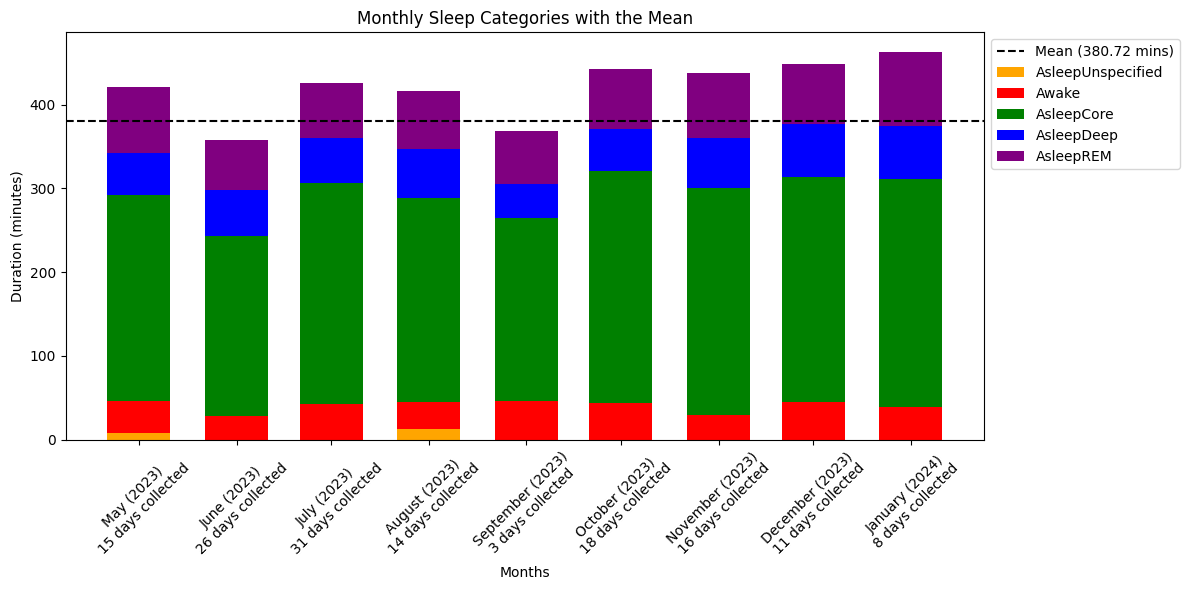

In [23]:
stacked_categories = ['AsleepUnspecified', 'Awake', 'AsleepCore', 'AsleepDeep', 'AsleepREM']

# Set up color mapping for each category
colors = ['orange', 'red', 'green', 'blue', 'purple']

# Plot a stacked bar chart with wider bars
plt.figure(figsize=(12, 6))

bottom = 0
# Iterate over categories
for i, category in enumerate(stacked_categories):
    plt.bar(
        monthly_df['month_year'].dt.to_timestamp(),
        monthly_df[category],
        label=category,
        color=colors[i],
        bottom=bottom,
        width=20  # Adjust the width as needed
    )
    bottom += monthly_df[category]  # Update the bottom array

# Calculate the mean 'InBed' duration separately
mean_inbed = daily_df['InBed'].mean()

# Add a line for the mean 'InBed' duration
plt.axhline(y=mean_inbed, color='black', linestyle='--', label=f'Mean ({mean_inbed:.2f} mins)')

plt.title('Monthly Sleep Categories with the Mean')
plt.xlabel('Months')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45)

# Modify x-axis labels to include month, year, and days
plt.xticks(
    monthly_df['month_year'].dt.to_timestamp(),
    [f'{month.strftime("%B")} ({month.year})\n{days} days collected' for month, days in zip(monthly_df['month_year'].dt.to_timestamp(), monthly_df['days'])],
    rotation=45
)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout()
plt.show()


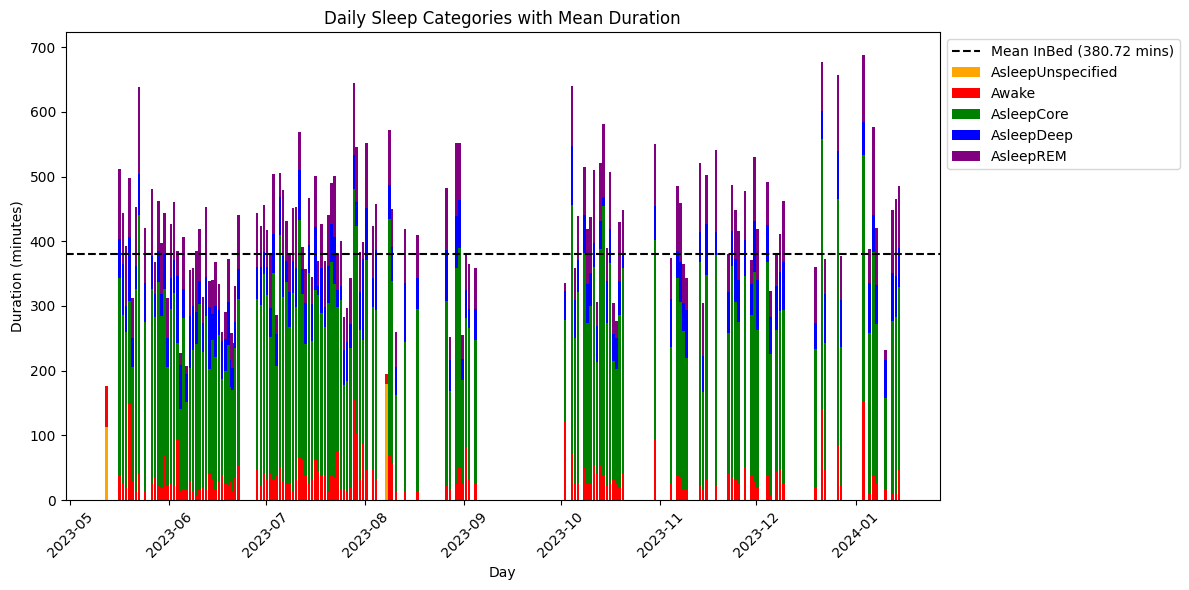

In [24]:
# Exclude 'InBed' from the sleep categories
stacked_categories = [
    'AsleepUnspecified',
    'Awake',
    'AsleepCore',
    'AsleepDeep',
    'AsleepREM'
]

# Set up color mapping for each category
colors = ['orange', 'red', 'green', 'blue', 'purple']

# Plot a stacked bar chart
plt.figure(figsize=(12, 6))
bottom = 0  # Variable to keep track of the bottom values for stacking

for i, category in enumerate(stacked_categories):
    plt.bar(
        daily_df['creationdate'],
        daily_df[category],
        label=category,
        color=colors[i],
        bottom=bottom
    )
    bottom += daily_df[category]


# Add a line for the mean 'InBed' duration
mean_inbed = daily_df['InBed'].mean()
plt.axhline(y=mean_inbed, color='black', linestyle='--', label=f'Mean InBed ({mean_inbed:.2f} mins)')

plt.title('Daily Sleep Categories with Mean Duration')
plt.xlabel('Day')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout()
plt.show()

In [29]:
import pandas as pd
from scipy.stats import pearsonr

# Assuming 'monthly_df' is your DataFrame with the calculated monthly sleep categories
# ...

# Filter months where 'days' are above 15
filtered_monthly_df = monthly_df[monthly_df['days'] > 15]
reverse_filtered_monthly_df = monthly_df[monthly_df['days'] <= 15]

# Calculate correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(filtered_monthly_df['InBed'], filtered_monthly_df['days'])

# Print the results
print(f"Correlation Coefficient of the months that has more than 15 days of recording: {correlation_coefficient}")
print(f"P-value: {p_value}")

# Check for statistical significance
if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("There is no significant correlation.")


# Calculate correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(reverse_filtered_monthly_df['InBed'], reverse_filtered_monthly_df['days'])

# Print the results
print(f"Correlation Coefficient of the months that has less than 16 days of recording: {correlation_coefficient}")
print(f"P-value: {p_value}")

# Check for statistical significance
if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("There is no significant correlation.")


Correlation Coefficient of the months that has more than 15 days of recording: -0.5699293949835934
P-value: 0.4300706050164065
There is no significant correlation.
Correlation Coefficient of the months that has less than 16 days of recording: 0.48799927801461035
P-value: 0.40428728117436524
There is no significant correlation.


H0 rejected since there is no correlation found frequency of recording and data